# Bonusleistung Paket 1
## Übung 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

Fehlerhafte Anführungsstriche aus Datei entfernen

In [13]:
with open(r'heart_study_dataset_3.csv', 'r') as infile, \
     open(r'heart_study_dataset_3_neu.csv', 'w') as outfile:
    data = infile.read()
    data = data.replace('"', '')
    outfile.write(data)

Datei 01_Kundendaten.csv einlesen, Dataframe erzeugen und ersten 5 und letzten 5 Zeilen ausgeben.

In [15]:
df_orig = pd.read_csv('heart_study_dataset_3_neu.csv', sep=',', quotechar='"')
df = df_orig

df

,female,age,educational background,Smoker,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack
0,0,58,Abitur,yes,5.0,0.000000,0,0,0,215.0,170.0,86.0,29.06,75.0,98.000000,0
1,1,60,Ausbildung,no,0.0,0.000000,0,0,0,240.0,137.0,84.0,29.51,82.0,88.000000,0
2,0,38,Abitur,no,0.0,0.000000,0,0,0,171.0,111.0,68.0,18.76,90.0,83.000000,0
3,1,53,Master,yes,30.0,0.000000,0,0,0,189.0,110.0,67.5,23.59,60.0,63.000000,0
4,1,52,Abitur,yes,15.0,0.000000,0,0,0,240.0,94.0,66.5,22.93,70.0,88.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0,48,Abitur,yes,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4038,0,44,Ausbildung,yes,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4039,0,52,Abitur,no,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4040,1,40,Bachelor,no,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [34]:
df['hadStroke'].unique()

array([0, 1])

## 1.1 Kategorisierung der Attribute

**Nominale Attribute**

- female (boolesch)
- educational background
- Smoker (boolesch)
- BPMeds (boolesch, wenn man einen Datensatz nicht beachtet (0.02961548))
- hadStroke (boolesch)
- hadHyp (boolesch)
- diabetes (boolesch)
- RiskHeartAttack (boolesch)


**Ordinale Attribute**

- RiskHeartAttack (boolesch)

**Metrische kontinuierliche Attribute**

- totChol
- sysBP
- diaBP
- BMI (Intervallskala)
- heartRate (Verhältnisskala)
- glucose

**Metrisch diskrete Attribute**

- age
- cigsPerDay (wenn man einen Datensatz nicht beachtet (9.00593683)

## 1.2 Statistische Parameter
Statistische Kennzahlen der numerischen Spalten

In [30]:
df.describe()

,female,age,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,0.430975,49.581395,8.989154,0.029560,0.006185,0.309005,0.025730,236.623349,132.318407,82.913657,25.782035,75.905462,81.998086,0.149184
std,0.495274,8.558368,11.861294,0.168338,0.078411,0.462141,0.158348,44.452553,22.018196,11.917345,4.039081,12.063593,22.926458,0.356313
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.500000,90.000000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Varianz der Spalten anzeigen:

In [31]:
df.var()

female                0.245296
age                  73.245662
cigsPerDay          140.690306
BPMeds                0.028338
hadStroke             0.006148
hadHyp                0.213574
diabetes              0.025074
totChol            1976.029426
sysBP               484.800968
diaBP               142.023105
BMI                  16.314172
heartRate           145.530287
glucose             525.622491
RiskHeartAttack       0.126959
dtype: float64

Neues Dataframe aus der Rückgabe der describe-Funktion auf das originale Dataframe.    
Danach dieses mithilfe der Funktionen für Varianz, Schiefe und Median erweitern.    

In [38]:
metricAttributes = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
param = df[metricAttributes].describe()
param.loc['var',:] = df[metricAttributes].var()
param.loc['skew',:] = df[metricAttributes].skew()
param.loc['median',:] = df[metricAttributes].median()
param

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,49.581395,8.989154,236.623349,132.318407,82.913657,25.782035,75.905462,81.998086
std,8.558368,11.861294,44.452553,22.018196,11.917345,4.039081,12.063593,22.926458
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000
75%,56.000000,20.000000,262.000000,143.500000,90.000000,27.990000,83.000000,85.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000
var,73.245662,140.690306,1976.029426,484.800968,142.023105,16.314172,145.530287,525.622491
skew,0.227035,1.256860,0.878194,1.154269,0.716025,0.960037,0.653590,6.607471


## 1.3 Histogramm

Histogramm mit Pandas für die SPalte age

<AxesSubplot:ylabel='Frequency'>

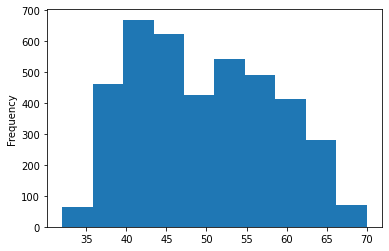

In [39]:
df['age'].plot.hist()

Histogramm für die Spalte "age" in Abhängigkeit von "y = cigsPerDay" mit matplotlib.

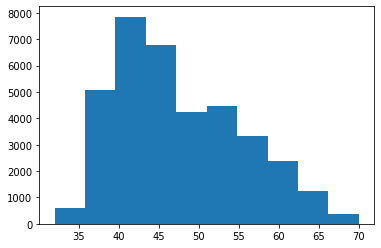

In [42]:
plt.hist(df["age"],
         weights = df['cigsPerDay'])
plt.show()

## 1.4 Box-Plot
Boxplot für das Attribut "BMI".

**Diese repräsentiert den Median**

**Unterschied zwischen Mittelwert und Median:**    
Median:		25.4    
Mittelwert:	25.78    
			-> In diesem Fall leichte Rechtsschiefe

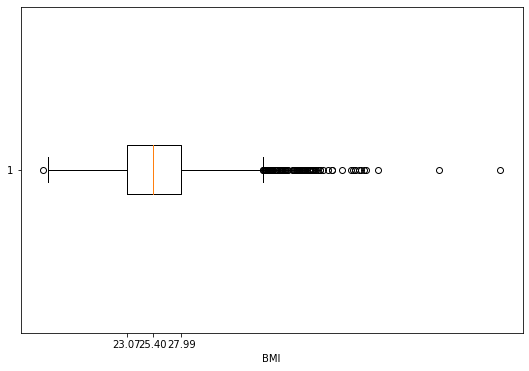

In [53]:
vel_arr = df['BMI']
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot()

ax.boxplot(vel_arr, vert = False)
ax.set_xlabel('BMI')
quantiles = np.quantile(vel_arr, np.array([0.25, 0.50, 0.75]))

ax.set_xticks(quantiles)

plt.show()

## 1.5 Lineare Korrelationen

**Am stärksten Positiv und Negativ korrelierende Werte:**    
Positiv: sysBP und diaBP (0,78)
Negativ: cigsPerDay und age (0,19)

In [59]:
df_corr = df.corr()
df_corr

,female,age,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack
female,1.000000,-0.021122,0.317743,-0.050780,-0.004934,0.009420,0.019496,-0.070093,-0.029232,0.063158,0.087329,-0.122491,0.010183,0.091319
age,-0.021122,1.000000,-0.188131,0.132472,0.059173,0.312700,0.099799,0.262890,0.391617,0.206875,0.133016,-0.007873,0.115721,0.227497
cigsPerDay,0.317743,-0.188131,1.000000,-0.044317,-0.033453,-0.063221,-0.036611,-0.023121,-0.082069,-0.052888,-0.083008,0.070858,-0.052040,0.059814
BPMeds,-0.050780,0.132472,-0.044317,1.000000,0.117936,0.259889,0.046279,0.076583,0.255811,0.193599,0.104451,0.016472,0.045012,0.088585
hadStroke,-0.004934,0.059173,-0.033453,0.117936,1.000000,0.076996,0.007110,0.000243,0.058558,0.046121,0.026028,-0.018218,0.018310,0.064396
hadHyp,0.009420,0.312700,-0.063221,0.259889,0.076996,1.000000,0.077315,0.164722,0.696337,0.613272,0.296038,0.149096,0.077133,0.178338
diabetes,0.019496,0.099799,-0.036611,0.046279,0.007110,0.077315,1.000000,0.041480,0.106919,0.048452,0.089416,0.044671,0.604083,0.103004
totChol,-0.070093,0.262890,-0.023121,0.076583,0.000243,0.164722,0.041480,1.000000,0.210685,0.167347,0.115005,0.096344,0.047884,0.075676
sysBP,-0.029232,0.391617,-0.082069,0.255811,0.058558,0.696337,0.106919,0.210685,1.000000,0.784056,0.323246,0.186531,0.127998,0.218795
diaBP,0.063158,0.206875,-0.052888,0.193599,0.046121,0.613272,0.048452,0.167347,0.784056,1.000000,0.374209,0.182940,0.056465,0.143920


## 1.6 Korrelationen-Heatmap
Da Tabellen für das menschliche Auge nur schwer zu interpretieren sind, ist hier eine Heatmap einer Korrelationsmatrix dargestellt. Dem Parameter data muss die oben erstellte Korrelationstabelle übergeben werden.

<AxesSubplot:>

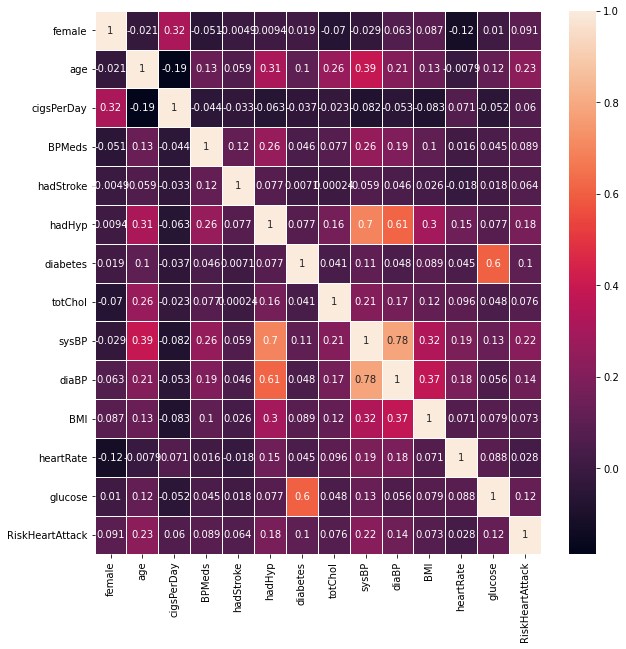

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data = df_corr, annot = True, linewidths=.5, ax=ax)

## 1.7 Streudiagramme
(pandas)-Streudiagramm zwischen BMI und diaBP.

<AxesSubplot:xlabel='BMI', ylabel='diaBP'>

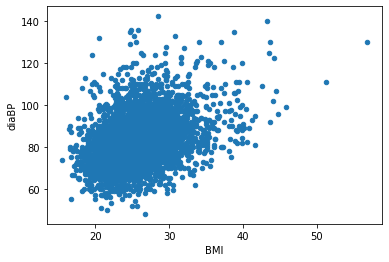

In [74]:
df.plot.scatter(x="BMI", y="diaBP")

(matplotlib)-Streudiagramm zwischen BMI und diaBP.

Text(0, 0.5, 'Tode')

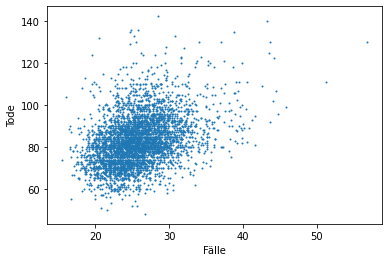

In [72]:
plt.scatter(df['BMI'], df['diaBP'], s = 1)
plt.xlabel('Fälle')
plt.ylabel('Tode')

Streudiagramme von Kombinationen der Attribute in Form einer Matrix.

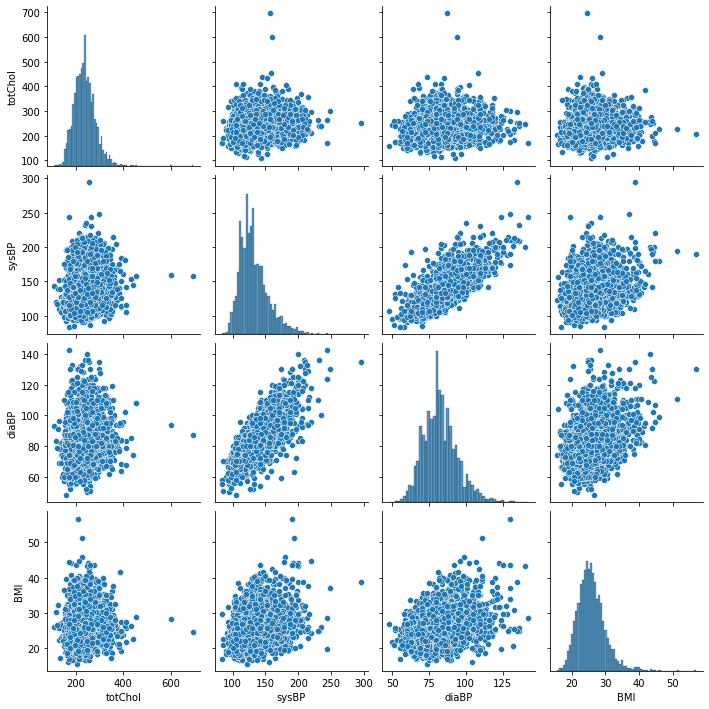

In [76]:
sn.pairplot(data = df[["totChol", "sysBP", "diaBP", "BMI"]])

## 1.8 Histogramme für kategorische Variablen

Zeichenketten von educational background in numerische Werte konvertieren.

In [77]:
df['educational background'].unique()

array(['Abitur', 'Ausbildung', 'Master', 'Bachelor'], dtype=object)

In [78]:
dfNumeric=df.copy()
dfNumeric['educational background'].replace(to_replace=['Abitur', 'Ausbildung', 'Master', 'Bachelor'], value=[0, 1, 2, 3], inplace=True)
dfNumeric['educational background'] = pd.to_numeric(dfNumeric['educational background'])

<AxesSubplot:ylabel='Frequency'>

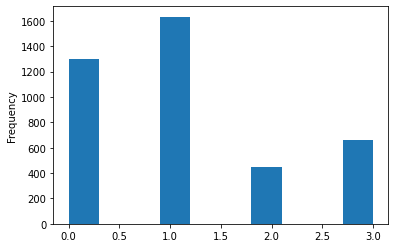

In [79]:
dfNumeric['educational background'].plot.hist()